In [47]:
#라이브 불러오기
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score, classification_report

In [6]:
#데이터 불러오기
data = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#데이터 확인
print(data.columns.tolist())  #컬럼명 확인
data.dtypes            #데이터 타입 확인

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
#결측치 제거
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

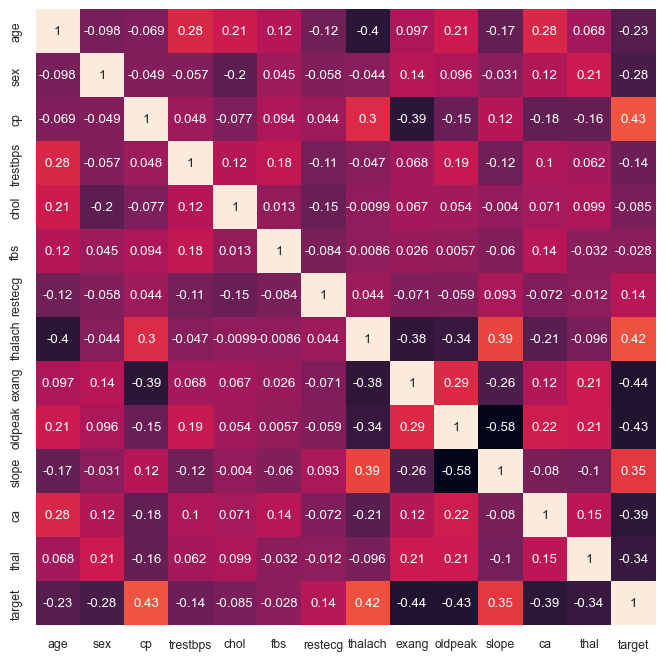

In [17]:
#상관관계 행렬
#0.3이상일 시 상관관계, 0.7이상일시 매우높음.
data_corr = data.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [25]:
#target 레이블 갯수 확인
data['target'].value_counts() #1이 심장병 환자

target
1    165
0    138
Name: count, dtype: int64

In [27]:
#입력값(X)과 출력값(y) 분리
X = data.drop('target', axis=1) #target 빼고 저장
y = data['target'] #target만 저장

In [29]:
#데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #데이터 분할 확인

((242, 13), (61, 13), (242,), (61,))

In [35]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [41]:
#딥러닝 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),             
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

#모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

model.summary()

C:\Users\Lim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.9272 - mae: 0.8110 - val_loss: 0.5868 - val_mae: 0.6260
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4857 - mae: 0.5822 - val_loss: 0.3699 - val_mae: 0.5210
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3187 - mae: 0.4784 - val_loss: 0.2774 - val_mae: 0.4676
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2434 - mae: 0.4199 - val_loss: 0.2263 - val_mae: 0.4116
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2536 - mae: 0.4229 - val_loss: 0.2006 - val_mae: 0.3764
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1816 - mae: 0.3563 - val_loss: 0.1896 - val_mae: 0.3545
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1645 - mae: 0.3366 - val_loss: 0.1863 - val_mae: 0.3427
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1612 - mae: 0.3329 - val_loss: 0.1792 - val_mae: 0.3336
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1253 - mae: 0.2905 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,565 (41.27 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,044 (27.52 KB)

In [53]:
#예측
y_pred = model.predict(X_test).flatten()
y_pred = (y_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


MAE: 0.19672131147540983
MSE: 0.19672131147540983
R² Score: 0.2112068965517242
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

[Confusion Matrix]



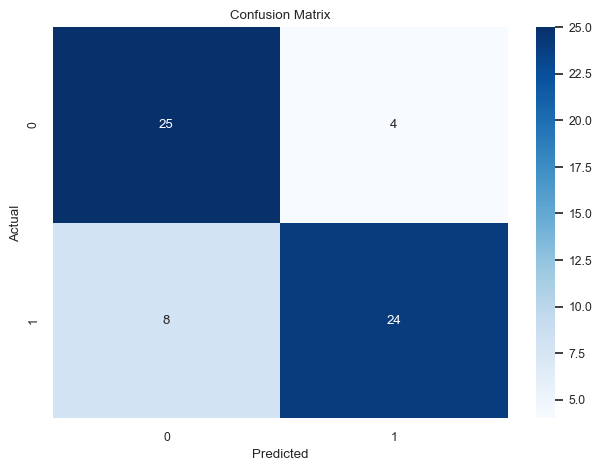

In [61]:
#평가 지표 출력
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))
print("[Confusion Matrix]\n")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()